In [3]:
! ros2 topic list

/parameter_events
/rosout


In [ ]:
! ros2 topic echo swarm_339505f036b44d67b712eb243d8d7e33_node01_R01

data: 130.0
---
data: 130.0
---
data: 130.0
---
data: 132.0
---
data: 130.0
---
data: 130.0
---
data: 130.0
---
data: 130.0
---
data: 130.0
---
data: 130.0
---
data: 130.0
---
data: 132.0
---
data: 130.0
---
data: 130.0
---
data: 132.0
---
data: 128.0
---
data: 128.0
---
data: 138.0
---
data: 138.0
---
data: 134.0
---
data: 134.0
---
data: 130.0
---
data: 130.0
---
data: 132.0
---
data: 130.0
---
data: 138.0
---
data: 138.0
---
data: 142.0
---
data: 130.0
---
data: 130.0
---
data: 134.0
---
data: 134.0
---
data: 130.0
---
data: 132.0
---
data: 132.0
---
data: 132.0
---
data: 132.0
---
data: 134.0
---
data: 134.0
---
data: 132.0
---
data: 132.0
---
data: 132.0
---
data: 132.0
---
data: 132.0
---
data: 130.0
---
data: 130.0
---
data: 132.0
---
data: 132.0
---
data: 132.0
---
data: 130.0
---
data: 130.0
---
data: 190.0
---
data: 190.0
---
data: 132.0
---
data: 130.0
---
data: 130.0
---
data: 130.0
---
data: 130.0
---
data: 130.0
---
data: 130.0
---
data: 130.0
---
data: 130.0
---
data: 13

RCLError: failed to shutdown: rcl_shutdown already called on the given context, at ./src/rcl/init.c:241

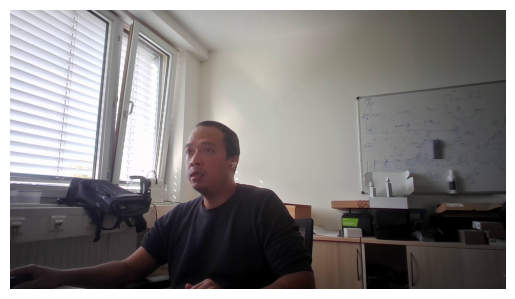

In [1]:
import rclpy
from rclpy.node import Node
from sensor_msgs.msg import Image
from cv_bridge import CvBridge
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

bridge = CvBridge()

class CameraSubscriber(Node):
    def __init__(self):
        super().__init__('camera_subscriber')
        self.subscription = self.create_subscription(
            Image,
            '/swarm_3d75e3c3910a49c3a94437456199b9fd_node02_R02',
            self.listener_callback,
            10)
        self.frame = None

    def listener_callback(self, msg):
        self.frame = bridge.imgmsg_to_cv2(msg, desired_encoding='bgr8')

rclpy.init()
node = CameraSubscriber()

try:
    while rclpy.ok():
        rclpy.spin_once(node, timeout_sec=0.1)

        if node.frame is not None:
            # Convert to RGB for matplotlib
            rgb = cv2.cvtColor(node.frame, cv2.COLOR_BGR2RGB)
            plt.imshow(rgb)
            plt.axis("off")
            clear_output(wait=True)   # refresh output
            display(plt.gcf())
            plt.clf()
except KeyboardInterrupt:
    pass

node.destroy_node()
rclpy.shutdown()
